Image Clasification Support Vector Machine with HOG feature descriptor

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn import svm

1.Persiapan Dataset

Upload data

In [2]:
train_images, train_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/Colab Notebooks/emnist-bymerge-train-images-idx3-ubyte',
                                             labels_path='/content/drive/MyDrive/Colab Notebooks/emnist-bymerge-train-labels-idx1-ubyte')

In [3]:
test_images, test_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/Colab Notebooks/emnist-bymerge-test-images-idx3-ubyte',
                                             labels_path='/content/drive/MyDrive/Colab Notebooks/emnist-bymerge-test-labels-idx1-ubyte')

Melihat isi dari dataset

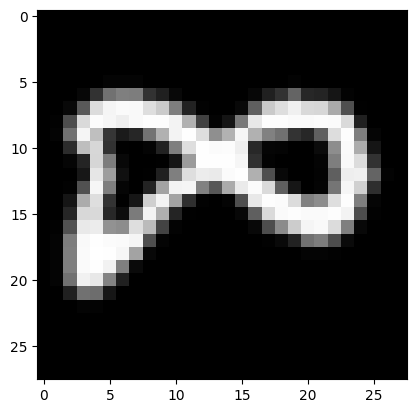

In [4]:
plt.imshow(train_images[30].reshape(28,28), cmap='gray')

In [5]:
train_labels[30]

8

Mendreskisikan data tersebut dengan HOG

In [6]:
feature, hog_img = hog(train_images[30].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [7]:
feature.shape

(144,)

<BarContainer object of 144 artists>

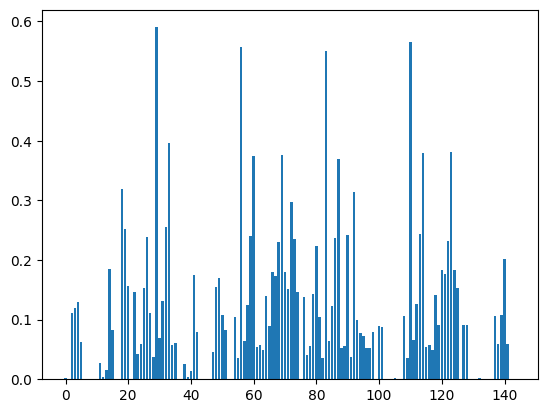

In [8]:
plt.bar(list(range(feature.shape[0])), feature)

  2.Train data preparation

Preprocessing train data untuk HOG Feature Extraction

In [9]:
n_dims = feature.shape[0]

In [10]:
n_dims

144

In [11]:
n_samples = train_images.shape[0]

In [12]:
n_samples

697932

Membuat variable dari dataset train

In [13]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

Mendeskrisikan HOG feature semua image train dari dataset dan menempatkan nya dengan variable yang baru saja di buat

In [14]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

2. Clasifikasi SVM

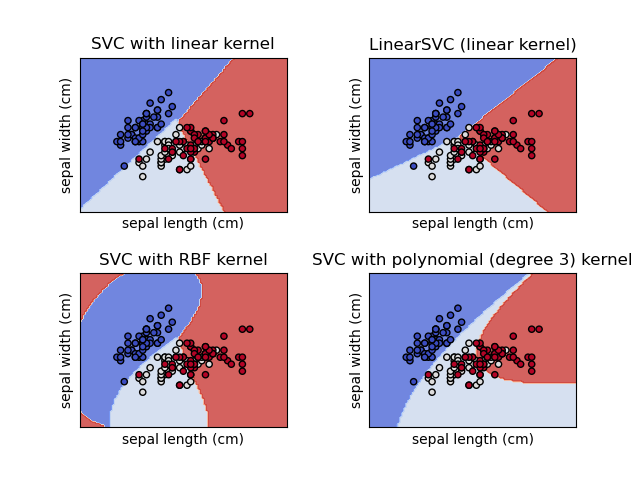

In [15]:
clf = svm.SVC(kernel='linear')

In [16]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

3. Test data preparation

Preprocessing train data untuk HOG Feature Extraction

In [17]:
n_dims = feature.shape[0]

In [18]:
n_dims

144

In [19]:
n_samples = test_images.shape[0]

In [20]:
n_samples

116323

Membuat variable dari dataset test

In [21]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [22]:
X_test.shape

(116323, 144)

Mendeskrisikan HOG feature semua image test dari dataset dan menempatkan nya dengan variable yang baru saja di buat

In [23]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

Fitting Clasifikasi yang sudah di lakukan di atas

In [ ]:
clf.fit(X_test, y_test)

Mengubah categorical label menjadi one hot label (latihan mengubah data menjadi binary)

In [34]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
lb = LabelBinarizer()

In [36]:
lb.fit(y_test)

LabelBinarizer()

In [109]:
y_test

array([24, 22, 28, ...,  3,  3,  7])

In [110]:
y_test.shape

(116323,)

In [101]:
y_test_one_hot = lb.transform(y_test)

In [102]:
y_test_one_hot[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [111]:
y_convert = lb.inverse_transform(y_test_one_hot)

In [112]:
y_convert

array([24, 22, 28, ...,  3,  3,  7])

Memprediksi image yang sudah di clasifikasikan di atas

In [58]:
y_pred_one_hot = clf.predict(X_test)

In [104]:
y_pred_one_hot

array([24, 22, 28, ...,  3,  3,  7])

In [107]:
y_pred_one_hot.shape

(116323,)

Melihat image dari dataset test

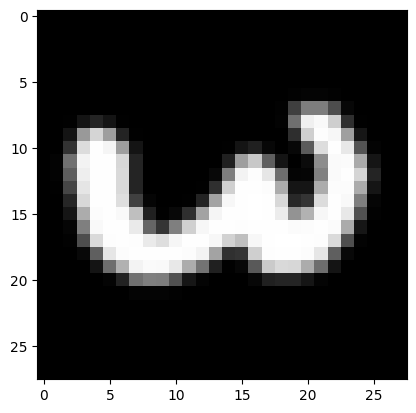

In [47]:
plt.imshow(test_images[30].reshape(28,28), cmap='gray')

In [51]:
out_one_hot = clf.predict(X_test[30].reshape(1, n_dims))

In [52]:
out_one_hot

array([3])

In [113]:
b_predik=lb.transform(out_one_hot)

In [114]:
b_predik

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [115]:
b_convert = lb.inverse_transform(b_predik)

In [116]:
b_convert

array([3])

4. Leave-One-Out-Cross-Validation (LOOCV)  Evaluation Metrics

Confussion Matrix

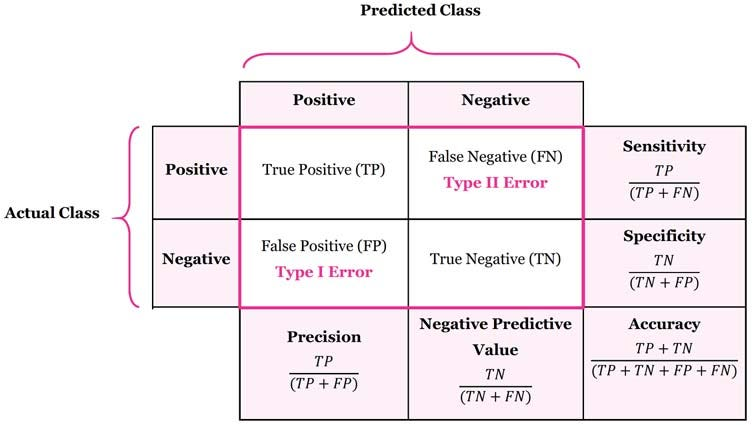

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
conf_mat = confusion_matrix(y_test, y_pred_one_hot)

In [61]:
conf_mat

array([[4343,    2,    2, ...,    0,    0,    0],
       [   0, 6130,   21, ...,    0,    4,    6],
       [   1,    1, 5491, ...,    2,    0,    5],
       ...,
       [   0,    4,    1, ...,   94,    1,    3],
       [   2,    6,    1, ...,    0, 2207,   15],
       [   1,    9,    5, ...,    0,   15, 2638]])

In [85]:
conf_mat.shape

(47, 47)

In [62]:
from mlxtend.plotting import plot_confusion_matrix

In [86]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12', '13', '14', '15', '16', '17', '18', '19', '20', '21','22','23','24', '25', '26', '27', '28', '29','30','31','32', '33', '34', '35', '36', '37','38', '39', '40', '41','42','43','44', '45', '46']

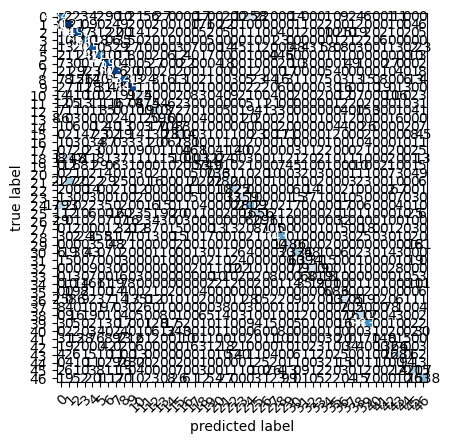

In [87]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

Precission

In [88]:
from sklearn.metrics import precision_score

In [89]:
precision = precision_score(y_test, y_pred_one_hot, average=None)

In [90]:
precision

array([0.67976209, 0.62531878, 0.91531922, 0.96295667, 0.91968504,
       0.9014564 , 0.93092543, 0.95727637, 0.8996126 , 0.89377049,
       0.86772983, 0.85431655, 0.871337  , 0.88558692, 0.87732342,
       0.71374253, 0.80979827, 0.90873786, 0.65878594, 0.93043478,
       0.92812106, 0.82663848, 0.92769857, 0.89800285, 0.67152761,
       0.93984109, 0.90519878, 0.87686567, 0.85839161, 0.90279465,
       0.89097889, 0.90189613, 0.92940199, 0.94901506, 0.87475728,
       0.85111663, 0.85803238, 0.87037037, 0.9421391 , 0.92874455,
       0.5       , 0.72195122, 0.88758934, 0.89749066, 0.8245614 ,
       0.92887205, 0.8988075 ])

Recall

In [91]:
from sklearn.metrics import recall_score

In [92]:
recall = recall_score(y_test, y_pred_one_hot, average=None)

In [93]:
recall

array([0.75596171, 0.9578125 , 0.95247181, 0.97254162, 0.95598399,
       0.89485543, 0.96647659, 0.97667291, 0.94447392, 0.96478499,
       0.87429112, 0.72852761, 0.88265306, 0.81088435, 0.82325581,
       0.86220472, 0.65348837, 0.8125    , 0.42726896, 0.82127193,
       0.90976514, 0.23287671, 0.91834677, 0.93190229, 0.5989339 ,
       0.91390728, 0.71325301, 0.84431138, 0.88150808, 0.91165644,
       0.91811709, 0.89452167, 0.8866878 , 0.91304348, 0.7539749 ,
       0.74162162, 0.82613909, 0.75643777, 0.94379391, 0.94244958,
       0.00234742, 0.25385935, 0.88990228, 0.89797009, 0.17636023,
       0.93319239, 0.88553206])

Accuracy

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy = accuracy_score(y_test, y_pred_one_hot)

In [96]:
accuracy

0.8580848155566827

F1-Score

In [97]:
from sklearn.metrics import f1_score

In [98]:
f1 = f1_score(y_test, y_pred_one_hot, average='macro')

In [99]:
f1

0.8111862661941349